PREPARING DATA FOR MODELLING

!pip install hyperopt

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import optimizers
from keras.optimizers import Adam
from keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import LSTM, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D

Load Data Extracted From First Part

In [3]:
#Load extracted features

import pickle as pickle
with open("C:/Users/sarim/Downloads/SCHOOL/MACHINE_LEARNING/COURSEWORK 3/Flattened_features.pkl", "rb") as f:
    features_df = pickle.load(f)


In [4]:
features_df.head()

,Emotion,Path,Sampling Rate,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,...,mel_spectrogram_std_119,mel_spectrogram_std_120,mel_spectrogram_std_121,mel_spectrogram_std_122,mel_spectrogram_std_123,mel_spectrogram_std_124,mel_spectrogram_std_125,mel_spectrogram_std_126,mel_spectrogram_std_127,mel_spectrogram_std_128
0,neutral,C:/Users/sarim/Downloads/RAVDESS/audio_speech_...,22050,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,...,0.000013,0.000014,0.000009,0.000005,0.000006,0.000017,0.000028,0.000021,0.000019,0.000002
1,neutral,C:/Users/sarim/Downloads/RAVDESS/audio_speech_...,22050,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,...,0.000031,0.000022,0.000019,0.000024,0.000025,0.000051,0.000036,0.000045,0.000023,0.000001
2,neutral,C:/Users/sarim/Downloads/RAVDESS/audio_speech_...,22050,-643.285645,74.262268,-1.228256,16.242317,5.608830,0.250306,-4.034254,...,0.000049,0.000050,0.000045,0.000064,0.000094,0.000130,0.000248,0.000141,0.000069,0.000007
3,neutral,C:/Users/sarim/Downloads/RAVDESS/audio_speech_...,22050,-644.624451,69.160400,3.003006,16.580229,7.867353,2.587296,-2.231727,...,0.000065,0.000080,0.000069,0.000095,0.000453,0.000181,0.000155,0.000175,0.000102,0.000007
4,calm,C:/Users/sarim/Downloads/RAVDESS/audio_speech_...,22050,-652.413757,87.086311,3.265245,20.345898,10.620335,1.831458,-5.369885,...,0.000034,0.000028,0.000022,0.000072,0.000030,0.000015,0.000018,0.000019,0.000015,0.000001


In [5]:
# DROP PATH COLUMN FOR MODELING
model_df = features_df.copy()
model_df.drop(columns=['Path','Sampling Rate'],inplace=True)

model_df.head()

,Emotion,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mel_spectrogram_std_119,mel_spectrogram_std_120,mel_spectrogram_std_121,mel_spectrogram_std_122,mel_spectrogram_std_123,mel_spectrogram_std_124,mel_spectrogram_std_125,mel_spectrogram_std_126,mel_spectrogram_std_127,mel_spectrogram_std_128
0,neutral,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,...,0.000013,0.000014,0.000009,0.000005,0.000006,0.000017,0.000028,0.000021,0.000019,0.000002
1,neutral,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,-7.923956,-16.231958,...,0.000031,0.000022,0.000019,0.000024,0.000025,0.000051,0.000036,0.000045,0.000023,0.000001
2,neutral,-643.285645,74.262268,-1.228256,16.242317,5.608830,0.250306,-4.034254,-8.218330,-14.603807,...,0.000049,0.000050,0.000045,0.000064,0.000094,0.000130,0.000248,0.000141,0.000069,0.000007
3,neutral,-644.624451,69.160400,3.003006,16.580229,7.867353,2.587296,-2.231727,-8.238157,-12.929442,...,0.000065,0.000080,0.000069,0.000095,0.000453,0.000181,0.000155,0.000175,0.000102,0.000007
4,calm,-652.413757,87.086311,3.265245,20.345898,10.620335,1.831458,-5.369885,-6.077728,-14.500923,...,0.000034,0.000028,0.000022,0.000072,0.000030,0.000015,0.000018,0.000019,0.000015,0.000001


In [6]:
model_df.shape

(35046, 389)

In [7]:
# Creating X(predictors) and Y(target)
X = model_df.drop(columns=['Emotion'])
y = model_df['Emotion']

In [8]:
#Checking for class imbalance

print(model_df['Emotion'].value_counts())

happy       5589
sad         5589
angry       5589
fear        5589
disgust     5589
neutral     4749
surprise    1776
calm         576
Name: Emotion, dtype: int64


Our classes are imbalanced, Stratifying would be performed on train set to ensure that model does not struggle to accurately classify 'surprise' and 'calm' instances, as they are the lowest in the distribution of the classes. This can help the model to learn the underrepresented classes better. Since we are working on an emotion recognition task, retaining the interpretability of the features (like which MFCC or Mel-Spectrogram is more important for predicting a particular emotion) could be important and so there would be no need for Resampling.

In [9]:
# Create a label (category) encoder object
le = LabelEncoder()

y_dl = y.copy()
# Fit the encoder on the data
le.fit(y_dl)

# Apply the fitted encoder to the data
y_dl= le.transform(y_dl)

In [10]:
# Train-validation-test split for traditional models
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)



# Train-validation-test split for DNN models (reuse the splits)
X_temp_dl, X_test_dl, y_temp_dl, y_test_dl = train_test_split(X, y_dl, test_size=0.2, random_state=42)
X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(X_temp_dl, y_temp_dl, test_size=0.2, random_state=42)

df_train = X_train.copy()
df_val = X_val.copy()
df_test = X_test.copy()
X_train.shape, X_train_dl.shape

((22428, 388), (22428, 388))

In [11]:
# Encoding the target variable for traditional models after split
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)


# One-hot encoding the target variable for deep learning models after split
y_train_dl = to_categorical(y_train_dl)
y_val_dl = to_categorical(y_val_dl)
y_test_dl = to_categorical(y_test_dl)

label_encoder.classes_

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype=object)

In the code above, I have first split the data using stratified sampling. After that, the labels are encoded for machine learning and deep learning models.on the raw labels, t The y_train_encoded, y_val_encoded, y_test_encoded are used for traditional machine learning models, and y_train_dl_encoded, y_val_dl_encoded, y_test_dl_encoded are used for deep learning models.

In [12]:
# Scaling the features for traditional models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Scaling the features for deep learning models
X_train_dl = scaler.fit_transform(X_train_dl)
X_test_dl = scaler.transform(X_test_dl)
X_val_dl = scaler.transform(X_val_dl)


In [13]:
# Reshape for LSTM
n_features = X_train_dl.shape[1] 
n_samples = X_train_dl.shape[0]
X_train_dl_lstm = X_train_dl.reshape(n_samples, n_features, 1) 
X_val_dl_lstm = X_val_dl.reshape(X_val_dl.shape[0], n_features, 1)
X_test_dl_lstm= X_test_dl.reshape(X_test_dl.shape[0], n_features, 1)



# Reshape for CNN

X_train_dl_cnn = X_train_dl[:,:,np.newaxis]
X_val_dl_cnn = X_val_dl[:,:,np.newaxis]
X_test_dl_cnn = X_test_dl[:,:,np.newaxis]

X_train_dl_lstm.shape, X_train_dl_cnn.shape

((22428, 388, 1), (22428, 388, 1))

BASELINES

Decision Trees, Random Forest, XGboost are good baselines that can handle imbalanced data relatively well.
Logistic Regression and Naive Bayes can be used as well, but they might require class weight adjustment to perform well on imbalanced data.

In [14]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Iterate over models and fit them to the training data
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

# Iterate over models and evaluate them on the validation data
for name, model in models.items():
    print(f"\n{name} Performance:")
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))


Training Decision Tree...
Training Logistic Regression...
Training Naive Bayes...

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       895
           1       0.78      0.87      0.82        92
           2       0.68      0.65      0.67       894
           3       0.67      0.69      0.68       894
           4       0.67      0.67      0.67       895
           5       0.72      0.72      0.72       760
           6       0.71      0.72      0.71       894
           7       0.78      0.82      0.80       284

    accuracy                           0.71      5608
   macro avg       0.72      0.74      0.73      5608
weighted avg       0.71      0.71      0.71      5608


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       895
           1       0.60      0.99      0.75        92
           2       0.54      0.53      0.5

FEATURE SELECTION

Importance from a tree-based model:  These models can provide a measure of how "important" each feature is in making accurate predictions. You could then take the top N most important features according to this metric. This method has the advantage of taking into account potential interactions between features that might be missed by univariate selection methods.

In [16]:
# Fit random forest model on the unscaled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i in range(df_train.shape[1]):
    print(f"{i+1}. Feature {df_train.columns[sorted_indices[i]]}, Importance: {importances[sorted_indices[i]]}")

# Set the importance threshold
threshold = 0.002

# Get the indices of the important features
important_indices = [index for index, importance in enumerate(importances) if importance >= threshold]

# Create a list of important feature names
important_features = [df_train.columns[index] for index in important_indices]

# Subset the unscaled dataframe to include only the important features
X_train_unscaled_sf = df_train[important_features]
X_val_unscaled_sf = df_val[important_features]
X_test_unscaled_sf = df_test[important_features]


Feature ranking:
1. Feature mfccs_std_4, Importance: 0.007346612450588306
2. Feature mfccs_mean_37, Importance: 0.0062775387019389116
3. Feature mel_spectrogram_std_8, Importance: 0.006130248269474972
4. Feature mfccs_std_1, Importance: 0.006046072117419588
5. Feature mel_spectrogram_mean_11, Importance: 0.005993143607833446
6. Feature mel_spectrogram_mean_8, Importance: 0.005971851279886102
7. Feature mfccs_std_23, Importance: 0.005948171552345096
8. Feature mfccs_mean_36, Importance: 0.005864887774719758
9. Feature mel_spectrogram_mean_10, Importance: 0.005806416106349562
10. Feature mfccs_mean_18, Importance: 0.005744675959627572
11. Feature mfccs_std_8, Importance: 0.005725911317243405
12. Feature mel_spectrogram_mean_75, Importance: 0.005610709866438852
13. Feature mel_spectrogram_mean_77, Importance: 0.005601153916174562
14. Feature mfccs_std_21, Importance: 0.0053597555522293784
15. Feature mfccs_std_24, Importance: 0.0052490062323471785
16. Feature mel_spectrogram_mean_76, Impo

In [17]:
#scale these selected feature dataframes
scaler = StandardScaler()

X_train_sf = scaler.fit_transform(X_train_unscaled_sf)
X_val_sf = scaler.transform(X_val_unscaled_sf)
X_test_sf = scaler.transform(X_test_unscaled_sf)

X_train_sf.shape, y_train.shape

((22428, 246), (22428,))

MODELLING and HYPERPARAMETER TUNING

SIMPLE CRNN

In [47]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, LSTM
from keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from keras import backend as K

# Define F1 score metric
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

n_features = X_train_dl.shape[1]
n_classes = y_train_dl.shape[1]  # Assuming y_train_dl is one-hot encoded

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # Additional Convolutional layer
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(LSTM(128))  # Increased LSTM units
model.add(Dense(n_classes, activation='softmax'))

# compile the model
optimizer = Adam(lr=0.001)  # Increased learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy', f1_score])

# training the model
history = model.fit(X_train_dl_cnn, y_train_dl, epochs=20, batch_size=32, validation_data=(X_val_dl_cnn, y_val_dl))  # Increased epochs

# evaluating the model
score = model.evaluate(X_test_dl_cnn, y_test_dl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test F1 Score:', score[2])

# Get the predicted classes
y_pred_crnn_prob = model.predict(X_test_dl_cnn)
y_pred_crnn = np.argmax(y_pred_cnn_prob, axis=1)

# Plot the confusion matrix
cm_crnn = confusion_matrix(y_test_cnn_label_encoded, y_pred_cnn)

# Convert the confusion matrix to percentages
cm_crnn_percentage = cm_cnn.astype('float') / cm_cnn.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_cnn_percentage, annot=True, fmt='.2%', cmap='Blues')
plt.show()



Epoch 1/20


c:\Users\sarim\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


701/701 [==============================] - 79s 109ms/step - loss: 1.6733 - categorical_accuracy: 0.3130 - f1_score: 0.0959 - val_loss: 1.6085 - val_categorical_accuracy: 0.3488 - val_f1_score: 0.0419
Epoch 2/20
701/701 [==============================] - 75s 108ms/step - loss: 1.5199 - categorical_accuracy: 0.3903 - f1_score: 0.1669 - val_loss: 1.4050 - val_categorical_accuracy: 0.4465 - val_f1_score: 0.2722
Epoch 3/20
701/701 [==============================] - 85s 122ms/step - loss: 1.3733 - categorical_accuracy: 0.4584 - f1_score: 0.3236 - val_loss: 1.3384 - val_categorical_accuracy: 0.4606 - val_f1_score: 0.3635
Epoch 4/20
701/701 [==============================] - 79s 113ms/step - loss: 1.3031 - categorical_accuracy: 0.4866 - f1_score: 0.3829 - val_loss: 1.2625 - val_categorical_accuracy: 0.4954 - val_f1_score: 0.3664
Epoch 5/20
701/701 [==============================] - 108s 154ms/step - loss: 1.2649 - categorical_accuracy: 0.5016 - f1_score: 0.4115 - val_loss: 1.2451 - val_categor

NameError: name 'y_pred_cnn_prob' is not defined

SIMPLE LSTM RNN MODEL

In [ ]:
# Define F1 score metric
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Define model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_dl.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(8, activation='softmax')) # number of classes is the dimension of the softmax vector

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_score])

# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=20, validation_data=(X_val_dl, y_val_dl), batch_size=32)

# Evaluate the model
score = model.evaluate(X_test_dl, y_test_dl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test F1 Score:', score[2])




Epoch 1/20
701/701 [==============================] - 454s 645ms/step - loss: 1.8771 - categorical_accuracy: 0.2609 - f1_score: 0.0968 - val_loss: 2.2626 - val_categorical_accuracy: 0.1685 - val_f1_score: 0.1408
Epoch 2/20
701/701 [==============================] - 454s 648ms/step - loss: 1.7312 - categorical_accuracy: 0.2953 - f1_score: 0.1096 - val_loss: 1.6992 - val_categorical_accuracy: 0.3090 - val_f1_score: 0.1235
Epoch 3/20
701/701 [==============================] - 466s 664ms/step - loss: 1.6609 - categorical_accuracy: 0.3230 - f1_score: 0.1210 - val_loss: 1.6121 - val_categorical_accuracy: 0.3609 - val_f1_score: 0.1441
Epoch 4/20
701/701 [==============================] - 372s 530ms/step - loss: 1.6276 - categorical_accuracy: 0.3396 - f1_score: 0.1405 - val_loss: 1.7890 - val_categorical_accuracy: 0.2618 - val_f1_score: 0.1503
Epoch 5/20
701/701 [==============================] - 294s 420ms/step - loss: 1.5992 - categorical_accuracy: 0.3526 - f1_score: 0.1533 - val_loss: 1.630

TUNED LSTM

In [21]:
#Tuned LSTM

# Define F1 score metric
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Define model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_dl.shape[1], 1))) 
model.add(Dropout(0.052))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.052))
model.add(BatchNormalization())

model.add(Dense(8, activation='softmax')) # number of classes is the dimension of the softmax vector

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', f1_score])

# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=30, validation_data=(X_val_dl, y_val_dl), batch_size=32)

# Evaluate the model
score = model.evaluate(X_test_dl, y_test_dl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test F1 Score:', score[2])


Epoch 1/30
701/701 [==============================] - 246s 346ms/step - loss: 1.8061 - categorical_accuracy: 0.2770 - f1_score: 0.0997 - val_loss: 1.8047 - val_categorical_accuracy: 0.2529 - val_f1_score: 0.1032
Epoch 2/30
701/701 [==============================] - 301s 429ms/step - loss: 1.6845 - categorical_accuracy: 0.3173 - f1_score: 0.1185 - val_loss: 1.6380 - val_categorical_accuracy: 0.3406 - val_f1_score: 0.1440
Epoch 3/30
701/701 [==============================] - 319s 455ms/step - loss: 1.6377 - categorical_accuracy: 0.3362 - f1_score: 0.1338 - val_loss: 1.8949 - val_categorical_accuracy: 0.3194 - val_f1_score: 0.2644
Epoch 4/30
701/701 [==============================] - 324s 462ms/step - loss: 1.6059 - categorical_accuracy: 0.3479 - f1_score: 0.1504 - val_loss: 1.6848 - val_categorical_accuracy: 0.3499 - val_f1_score: 0.2497
Epoch 5/30
701/701 [==============================] - 328s 469ms/step - loss: 1.5882 - categorical_accuracy: 0.3552 - f1_score: 0.1613 - val_loss: 1.613

SIMPLE CNN

In [38]:
# Define F1 score metric
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Define model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train_dl.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy', f1_score])

# Train model
history = model.fit(X_train_dl_cnn, y_train_dl, epochs=30, validation_data=(X_val_dl, y_val_dl))

# Evaluate the model
score = model.evaluate(X_test_dl, y_test_dl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test F1 Score:', score[2])


Epoch 1/30
701/701 [==============================] - 63s 89ms/step - loss: 1.3242 - categorical_accuracy: 0.4924 - f1_score: 0.3961 - val_loss: 1.0760 - val_categorical_accuracy: 0.5836 - val_f1_score: 0.4909
Epoch 2/30
701/701 [==============================] - 63s 90ms/step - loss: 1.1187 - categorical_accuracy: 0.5637 - f1_score: 0.5022 - val_loss: 1.0016 - val_categorical_accuracy: 0.6054 - val_f1_score: 0.5301
Epoch 3/30
701/701 [==============================] - 61s 86ms/step - loss: 1.0569 - categorical_accuracy: 0.5857 - f1_score: 0.5304 - val_loss: 0.9888 - val_categorical_accuracy: 0.6254 - val_f1_score: 0.5219
Epoch 4/30
701/701 [==============================] - 63s 90ms/step - loss: 1.0207 - categorical_accuracy: 0.5990 - f1_score: 0.5457 - val_loss: 0.9425 - val_categorical_accuracy: 0.6418 - val_f1_score: 0.5392
Epoch 5/30
701/701 [==============================] - 66s 94ms/step - loss: 0.9898 - categorical_accuracy: 0.6158 - f1_score: 0.5654 - val_loss: 0.9137 - val_ca

In [ ]:
# Get the predicted classes
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

# Plot the confusion matrix
cm_cnn = confusion_matrix(y_test_cnn_label_encoded, y_pred_cnn)

# Convert the confusion matrix to percentages
cm_cnn_percentage = cm_cnn.astype('float') / cm_cnn.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_cnn_percentage, annot=True, fmt='.2%', cmap='Blues')
plt.show()


BAYESIAN OPTIMIZATION

XGBOOST

In [ ]:
#Bayesian Optimization
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    return roc_auc_score(y_test, y_pred, multi_class="ovr", average=average)

auc_scorer = make_scorer(multiclass_roc_auc_score, needs_proba=True)


# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': float(params['learning_rate']),
        'subsample': float(params['subsample']),
        'min_child_weight': float(params['min_child_weight']),
        'colsample_bytree': float(params['colsample_bytree']),
        'gamma': float(params['gamma']),
    }
    
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(model, X_train_sf, y_train, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5)).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 6, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0.5, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1),
    'gamma': hp.uniform('gamma', 0, 1),
}

# Run the optimizer
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print(best)


SVM

In [ ]:
# Define the objective function
def objective(params):
    params = {
        'C': abs(float(params['C'])),
        'gamma': abs(float(params['gamma'])),
        'kernel': str(params['kernel'])
    }
    
    model = SVC(**params, probability=True)
    score = cross_val_score(model, X_train_sf, y_train, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5)).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter space
space = {
    'C': hp.normal('C', 0, 10),
    'gamma': hp.normal('gamma', 0, 1),
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly'])
}

# Run the optimizer
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

print(best)


100%|██████████| 5/5 [1:30:18<00:00, 1083.76s/trial, best loss: -0.9745543421566275]
{'C': 6.579861091236223, 'gamma': -0.3581757594907211, 'kernel': 2}


KNN

In [ ]:
#Bayesian Optimization
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    return roc_auc_score(y_test, y_pred, multi_class="ovr", average=average)

auc_scorer = make_scorer(multiclass_roc_auc_score, needs_proba=True)

# Define the objective function
def objective(params):
    params = {
        'n_neighbors': int(params['n_neighbors']),
        'weights': str(params['weights']),
        'p': int(params['p'])
    }
    
    model = KNeighborsClassifier(**params)
    score = cross_val_score(model, X_train_sf, y_train, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5)).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter space
space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2])  # 1 for Manhattan Distance, 2 for Euclidean Distance
}

# Run the optimizer
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

print(best)


  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 5/5 [01:16<00:00, 15.29s/trial, best loss: -0.9714101847391969]
{'n_neighbors': 14.0, 'p': 0, 'weights': 1}


LSTM TUNING 

In [20]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from keras.callbacks import EarlyStopping


space = {
    'units': hp.choice('units', [32, 64, 128]),
    'dropout': hp.uniform('dropout', 0, 0.5),
    'batch_size': hp.choice('batch_size', [32, 64, 128]),
    'epochs':  hp.choice('epochs', [10, 20, 30, 40, 50]),
    'optimizer': hp.choice('optimizer',['rmsprop', 'adam', 'sgd']),
}

def objective(space):
    model = Sequential()
    model.add(LSTM(space['units'], input_shape=(X_train_dl.shape[1], 1)))
    model.add(Dropout(space['dropout']))
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer=space['optimizer'],
                  metrics=['accuracy'])
    
    history = model.fit(X_train_dl, y_train_dl, 
                        validation_data=(X_val_dl, y_val_dl), 
                        epochs=space['epochs'], 
                        batch_size=space['batch_size'], 
                        verbose=2,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    
    acc = history.history['val_accuracy'][-1]
    return {'loss': -acc, 'status': STATUS_OK }

trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5,
            trials=trials)

print(best)


  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

Epoch 1/30                                           

701/701 - 149s - loss: 1.9133 - accuracy: 0.2158 - val_loss: 1.9552 - val_accuracy: 0.1617 - 149s/epoch - 213ms/step

Epoch 2/30                                           

701/701 - 157s - loss: 1.8949 - accuracy: 0.2167 - val_loss: 1.8657 - val_accuracy: 0.2229 - 157s/epoch - 224ms/step

Epoch 3/30                                           

701/701 - 158s - loss: 1.8103 - accuracy: 0.2567 - val_loss: 1.7495 - val_accuracy: 0.2757 - 158s/epoch - 225ms/step

Epoch 4/30                                           

701/701 - 120s - loss: 1.8389 - accuracy: 0.2384 - val_loss: 1.8313 - val_accuracy: 0.2249 - 120s/epoch - 172ms/step

Epoch 5/30                                           

701/701 - 158s - loss: 1.7987 - accuracy: 0.2560 - val_loss: 1.7358 - val_accuracy: 0.2627 - 158s/epoch - 225ms/step

Epoch 6/30                                           

701/701 - 160s - loss: 1.7597 - accuracy: 0.2689 - val_loss: 1.7636 - val_accura

Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define a dictionary of models
models = {
    
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False) 
}

# Loop over models to perform RandomizedSearchCV
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    # Using stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5)

    param_distributions = None
    if model_name == 'SVM':
        param_distributions = {
        'C': loguniform(0.1, 10), 
        'gamma': [1, 0.1],
        'kernel': ['rbf', 'linear'],
        }
    elif model_name == 'KNN':
       param_distributions = {
        'n_neighbors': randint(1, 16),
        'weights': ['uniform', 'distance'],
       }
    elif model_name == 'XGBoost':
        param_distributions = {
        'n_estimators': randint(50, 100),
        'max_depth': randint(6, 10),
        'learning_rate': [0.01, 0.1],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'min_child_weight': [1.0, 3.0],
        'gamma': [0, 0.5],
    }

    if param_distributions is not None:
        rand_search = RandomizedSearchCV(model, param_distributions, cv=skf, scoring='roc_auc', verbose=2, n_jobs=-1, n_iter=10)
        rand_search.fit(X_train_sf, y_train)
        best_model = rand_search.best_estimator_
        print(f"Best parameters for {model_name}: {rand_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_sf, y_train)
        print(f"Using default parameters for {model_name}")

    # evaluate the model
    y_pred = best_model.predict(X_val_sf)
    print(f"Classification report for {model_name}:")
    print(classification_report(y_val, y_pred))
    print(f"AUC-ROC for {model_name}: {roc_auc_score(y_val, best_model.predict_proba(X_val_sf), multi_class='ovr', average='weighted')}")
    print("\n")


TRADITIONAL MODEL EVALUATION

In [26]:
#XGBoost

# Hyperparameters
XGBparams = {
    'learning_rate': 0.1, 
    'n_estimators': 169,  
    'max_depth': 18,  
    'subsample': 0.7,
    'min_child_weight': 1.5,
    'colsample_bytree': 0.5,
    'gamma': 0.05
}
# Initialize and fit the model
model_xgb = XGBClassifier(**XGBparams)
model_xgb.fit(X_train_sf, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=1.5, missing=nan, monotone_constraints=None,
              n_estimators=169, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [27]:
#CatBoost
model_cat = CatBoostClassifier()
model_cat.fit(X_train_sf, y_train)

Learning rate set to 0.092729
0:	learn: 1.9835705	total: 423ms	remaining: 7m 2s
1:	learn: 1.8917514	total: 585ms	remaining: 4m 52s
2:	learn: 1.8259166	total: 759ms	remaining: 4m 12s
3:	learn: 1.7691852	total: 908ms	remaining: 3m 46s
4:	learn: 1.7181205	total: 1.07s	remaining: 3m 33s
5:	learn: 1.6729046	total: 1.24s	remaining: 3m 25s
6:	learn: 1.6301316	total: 1.42s	remaining: 3m 21s
7:	learn: 1.5968387	total: 1.57s	remaining: 3m 15s
8:	learn: 1.5642722	total: 1.74s	remaining: 3m 11s
9:	learn: 1.5361991	total: 1.91s	remaining: 3m 8s
10:	learn: 1.5094294	total: 2.08s	remaining: 3m 7s
11:	learn: 1.4835027	total: 2.28s	remaining: 3m 7s
12:	learn: 1.4633776	total: 2.52s	remaining: 3m 11s
13:	learn: 1.4435909	total: 2.77s	remaining: 3m 15s
14:	learn: 1.4230981	total: 3.02s	remaining: 3m 18s
15:	learn: 1.4057588	total: 3.26s	remaining: 3m 20s
16:	learn: 1.3879484	total: 3.51s	remaining: 3m 23s
17:	learn: 1.3714388	total: 3.74s	remaining: 3m 24s
18:	learn: 1.3574283	total: 3.99s	remaining: 3m 

In [42]:
#SVM
from sklearn import svm

# Hyperparameters
params = {
    'C': 6.6,  
    'kernel': 'rbf',  
    'gamma': 'scale'
}

# Initialize and fit the model
model_svm = svm.SVC(**params)
model_svm.fit(X_train_sf, y_train)

SVC(C=6.6)

In [43]:
#KNN
# Hyperparameters
params = {
    'n_neighbors': 14, 
    'p': 1, 
    'weights': 'uniform'
}

# Initialize and fit the model
model_knn = KNeighborsClassifier(**params)
model_knn.fit(X_train_sf, y_train)

KNeighborsClassifier(n_neighbors=14, p=1)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1118
           1       0.89      0.98      0.93       115
           2       0.85      0.77      0.81      1118
           3       0.88      0.80      0.84      1118
           4       0.83      0.84      0.84      1118
           5       0.80      0.86      0.83       950
           6       0.82      0.89      0.85      1118
           7       0.95      0.99      0.97       355

    accuracy                           0.85      7010
   macro avg       0.86      0.88      0.87      7010
weighted avg       0.85      0.85      0.85      7010

XGBoost Confusion Matrix:


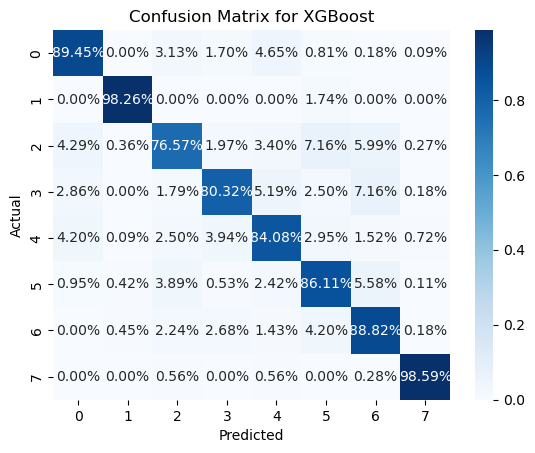

       Actual Predicted
0     disgust   disgust
1       angry     angry
2         sad       sad
3       happy     happy
4         sad       sad
...       ...       ...
7005     fear      fear
7006    happy     happy
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]


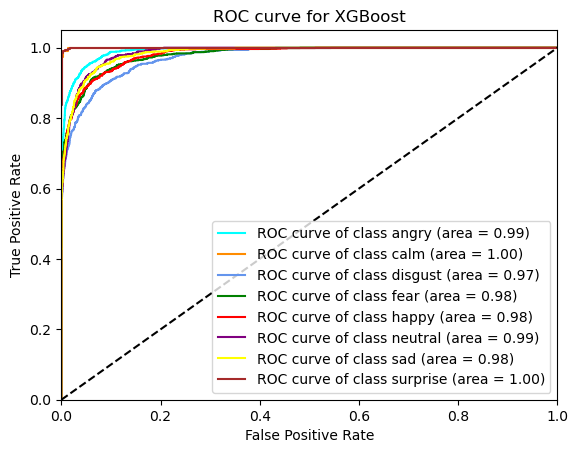

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1118
           1       0.91      0.96      0.93       115
           2       0.79      0.74      0.76      1118
           3       0.84      0.78      0.81      1118
           4       0.81      0.80      0.80      1118
           5       0.78      0.83      0.80       950
           6       0.80      0.85      0.83      1118
           7       0.97      0.98      0.97       355

    accuracy                           0.82      7010
   macro avg       0.84      0.85      0.85      7010
weighted avg       0.82      0.82      0.82      7010

CatBoost Confusion Matrix:


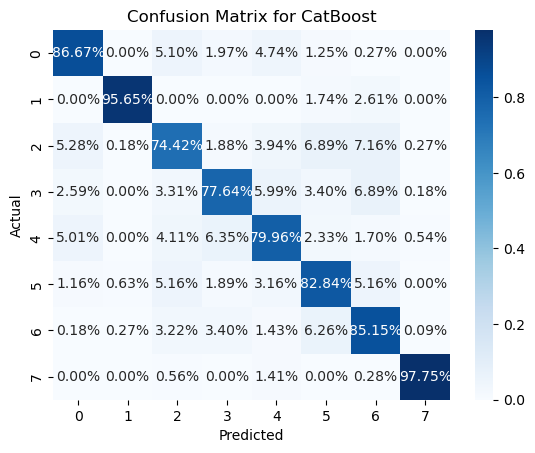

       Actual Predicted
0     disgust   disgust
1       angry   disgust
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy     happy
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]


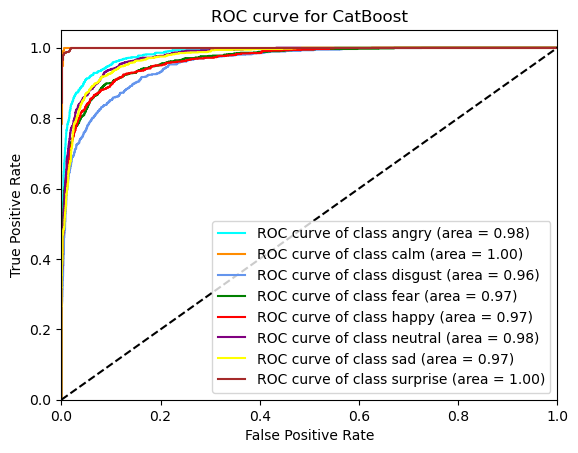

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1118
           1       0.86      0.96      0.91       115
           2       0.70      0.70      0.70      1118
           3       0.77      0.69      0.72      1118
           4       0.78      0.77      0.77      1118
           5       0.70      0.75      0.73       950
           6       0.73      0.78      0.75      1118
           7       0.96      0.98      0.97       355

    accuracy                           0.77      7010
   macro avg       0.80      0.81      0.80      7010
weighted avg       0.77      0.77      0.77      7010

SVM Confusion Matrix:


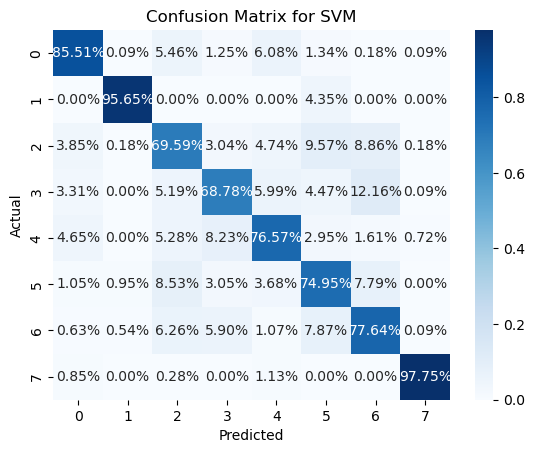

       Actual Predicted
0     disgust   disgust
1       angry     angry
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy     happy
7007    happy     happy
7008  neutral     happy
7009     fear      fear

[7010 rows x 2 columns]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1118
           1       0.78      0.87      0.82       115
           2       0.59      0.62      0.61      1118
           3       0.65      0.58      0.61      1118
           4       0.69      0.58      0.63      1118
           5       0.60      0.71      0.65       950
           6       0.65      0.72      0.68      1118
           7       0.89      0.95      0.92       355

    accuracy                           0.68      7010
   macro avg       0.71      0.72      0.71      7010
weighted avg       0.68      0.68      0.68      7010

KNN Confu

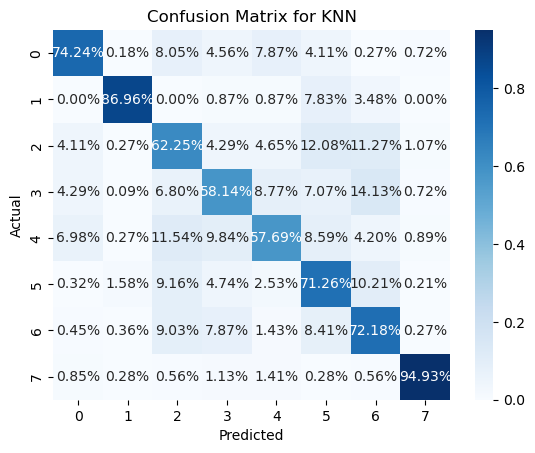

       Actual Predicted
0     disgust   neutral
1       angry   disgust
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy   disgust
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]


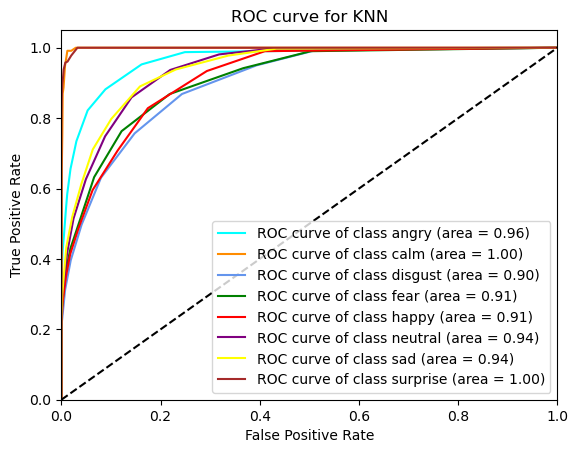

           XGBoost  CatBoost       SVM       KNN
Accuracy  0.851355  0.821541  0.769757  0.676462
ROC_AUC   0.912381  0.894626  0.864084  0.809394


In [46]:
label_map = {i: label_encoder.inverse_transform([i])[0] for i in range(len(label_encoder.classes_))}
# Get class names from the label encoder
class_names = label_encoder.classes_

# For multiclass AUC
def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

models = [model_xgb, model_cat, model_svm, model_knn]
model_names = ['XGBoost', 'CatBoost', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_sf)

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)

    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    roc_auc = multiclass_roc_auc_score(y_test, y_pred)
    accuracy = model.score(X_test_sf, y_test)
    model_metrics[name] = [accuracy, roc_auc]

    # Create a DataFrame from y_test
    df_y_test = pd.DataFrame(y_test, columns=['Actual'])
    df_y_test['Actual'] = df_y_test['Actual'].map(label_map)

    # Add the predictions to the DataFrame
    df_y_test['Predicted'] = y_pred
    df_y_test['Predicted'] = df_y_test['Predicted'].map(label_map)

    print(df_y_test)

    # Skip the SVM model for predict_proba
    if name != 'SVM':
        y_score = model.predict_proba(X_test_sf)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'yellow', 'brown'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(label_map[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC curve for {name}')
        plt.legend(loc="lower right")
        plt.show()

metrics_df = pd.DataFrame(model_metrics, index=['Accuracy', 'ROC_AUC'])
print(metrics_df)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1118
           1       0.89      0.98      0.93       115
           2       0.85      0.77      0.81      1118
           3       0.88      0.80      0.84      1118
           4       0.83      0.84      0.84      1118
           5       0.80      0.86      0.83       950
           6       0.82      0.89      0.85      1118
           7       0.95      0.99      0.97       355

    accuracy                           0.85      7010
   macro avg       0.86      0.88      0.87      7010
weighted avg       0.85      0.85      0.85      7010

XGBoost Confusion Matrix:


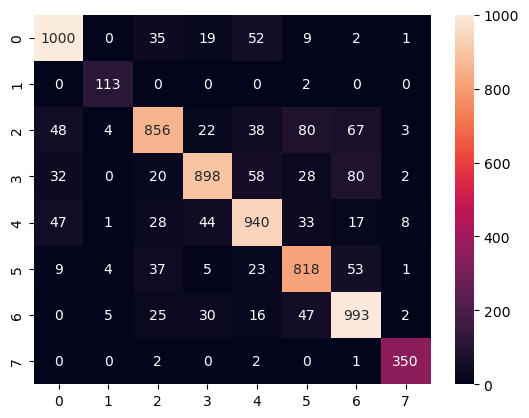

       Actual Predicted
0     disgust   disgust
1       angry     angry
2         sad       sad
3       happy     happy
4         sad       sad
...       ...       ...
7005     fear      fear
7006    happy     happy
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1118
           1       0.91      0.96      0.93       115
           2       0.79      0.74      0.76      1118
           3       0.84      0.78      0.81      1118
           4       0.81      0.80      0.80      1118
           5       0.78      0.83      0.80       950
           6       0.80      0.85      0.83      1118
           7       0.97      0.98      0.97       355

    accuracy                           0.82      7010
   macro avg       0.84      0.85      0.85      7010
weighted avg       0.82      0.82      0.82      7010

CatB

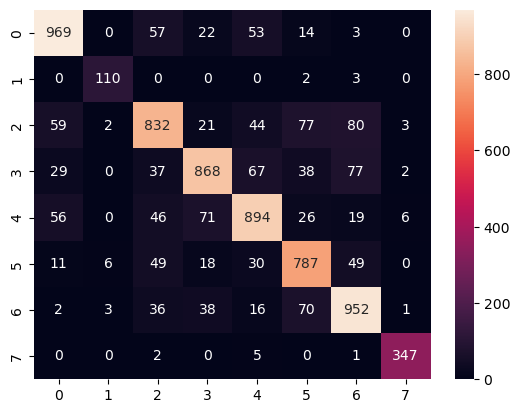

       Actual Predicted
0     disgust   disgust
1       angry   disgust
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy     happy
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1118
           1       0.86      0.96      0.91       115
           2       0.70      0.70      0.70      1118
           3       0.77      0.69      0.72      1118
           4       0.78      0.77      0.77      1118
           5       0.70      0.75      0.73       950
           6       0.73      0.78      0.75      1118
           7       0.96      0.98      0.97       355

    accuracy                           0.77      7010
   macro avg       0.80      0.81      0.80      7010
weighted avg       0.77      0.77      0.77      7010

SVM Confu

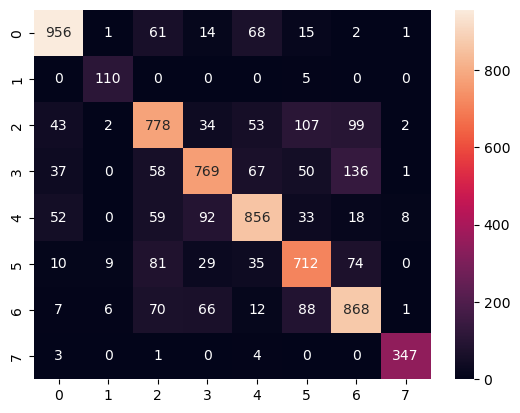

       Actual Predicted
0     disgust   disgust
1       angry     angry
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy     happy
7007    happy     happy
7008  neutral     happy
7009     fear      fear

[7010 rows x 2 columns]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1118
           1       0.78      0.87      0.82       115
           2       0.59      0.62      0.61      1118
           3       0.65      0.58      0.61      1118
           4       0.69      0.58      0.63      1118
           5       0.60      0.71      0.65       950
           6       0.65      0.72      0.68      1118
           7       0.89      0.95      0.92       355

    accuracy                           0.68      7010
   macro avg       0.71      0.72      0.71      7010
weighted avg       0.68      0.68      0.68      7010

KNN Confu

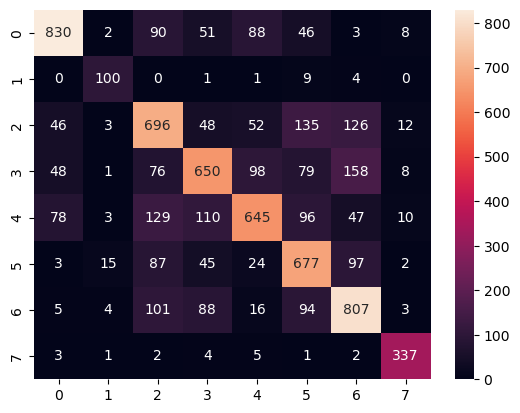

       Actual Predicted
0     disgust   neutral
1       angry   disgust
2         sad       sad
3       happy   disgust
4         sad       sad
...       ...       ...
7005     fear     happy
7006    happy   disgust
7007    happy     happy
7008  neutral   neutral
7009     fear      fear

[7010 rows x 2 columns]
           XGBoost  CatBoost       SVM       KNN
Accuracy  0.851355  0.821541  0.769757  0.676462
ROC_AUC   0.927915  0.911883  0.887030  0.837210


In [37]:
label_map = {i: label_encoder.inverse_transform([i])[0] for i in range(len(label_encoder.classes_))}

# For multiclass AUC
def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

models = [model_xgb, model_cat, model_svm, model_knn]
model_names = ['XGBoost', 'CatBoost', 'SVM', 'KNN']
model_metrics = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_sf)

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)

    # Convert the confusion matrix to percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues')
    plt.show()

    roc_auc = multiclass_roc_auc_score(y_test, y_pred)
    accuracy = model.score(X_test_sf, y_test)
    model_metrics[name] = [accuracy, roc_auc]

    # Create a DataFrame from y_test
    df_y_test = pd.DataFrame(y_test, columns=['Actual'])

    # Replace encoded labels with actual class names
    df_y_test['Actual'] = df_y_test['Actual'].map(label_map)

    # Add the predictions to the DataFrame
    df_y_test['Predicted'] = y_pred

    # Replace encoded labels in predictions with actual class names
    df_y_test['Predicted'] = df_y_test['Predicted'].map(label_map)

    print(df_y_test)

metrics_df = pd.DataFrame(model_metrics, index=['Accuracy', 'ROC_AUC'])
print(metrics_df)


